## Load the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\data sets/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Explore the data set

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df[df.duplicated()].sum()

Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

### Checking for missing values

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### for 'pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude'

In [9]:
invalid_piclon=df[(df['pickup_longitude']<-180)|(df['pickup_longitude']>180)]
invalid_droplon=df[(df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180)]  
invalid_piclat=df[(df['pickup_latitude']<-90)|(df['pickup_latitude']>90)]
invalid_droplat=df[(df['dropoff_latitude']<-90)|(df['dropoff_latitude']<90)]

### impute invalid data with 'nan'

In [10]:
df['pickup_longitude']=np.where((df['pickup_longitude']<-180)|(df['pickup_longitude']>180),np.nan,df['pickup_longitude'])

In [11]:
df['dropoff_longitude']=np.where((df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180),np.nan,df['dropoff_longitude'])
df['pickup_latitude']=np.where((df['pickup_latitude']<-90)|(df['pickup_latitude']>90),np.nan,df['pickup_latitude'])
df['dropoff_latitude']=np.where((df['dropoff_latitude']<-90)|(df['dropoff_latitude']>90),np.nan,df['dropoff_latitude'])


In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

### Then impute  missing values with median

In [13]:
df['pickup_longitude']=df['pickup_longitude'].fillna(df['pickup_longitude'].median())

In [14]:
df['pickup_latitude']=df['pickup_latitude'].fillna(df['pickup_latitude'].median())
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].median())

### Find the distance 

In [15]:
from geopy.distance import great_circle

In [16]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    
 
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    
 
    return great_circle(start_coordinates,stop_coordinates).km

In [17]:
df['distance']=df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [18]:
df['distance']=round(df['distance'],0)

In [19]:
df['distance']

0          2.0
1          2.0
2          5.0
3          2.0
4          4.0
          ... 
199995     0.0
199996     2.0
199997    13.0
199998     4.0
199999     5.0
Name: distance, Length: 200000, dtype: float64

<Axes: >

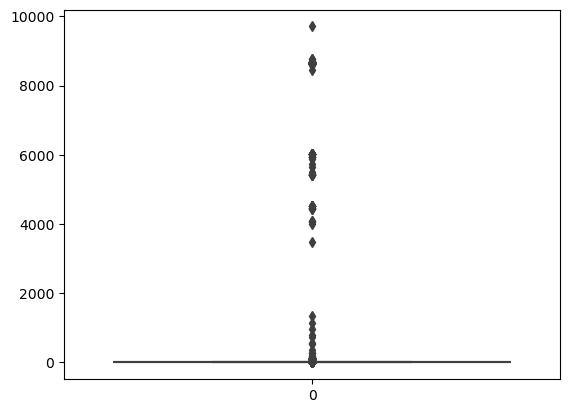

In [20]:
df['distance']
sns.boxplot(df['distance'])

### Handling the outliers

In [21]:
df['distance'].describe()

count    200000.000000
mean         20.610985
std         380.225836
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        9710.000000
Name: distance, dtype: float64

In [22]:
q1=df['distance'].quantile(0.25)
q3=df['distance'].quantile(0.90)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df.loc[df['distance']>=ub,'distance']=ub
df.loc[df['distance']<=lb,'distance']=lb

In [23]:
df['distance'].describe()

count    200000.000000
mean          3.201700
std           3.245924
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          16.000000
Name: distance, dtype: float64

<Axes: >

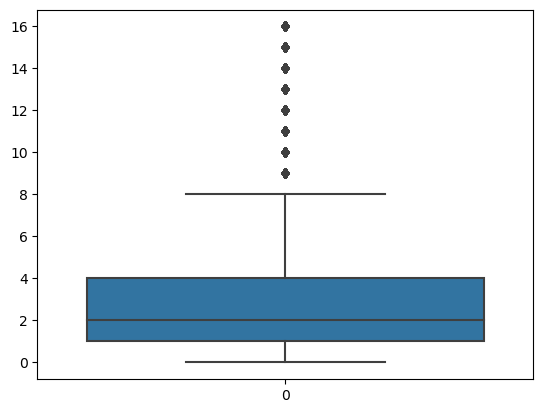

In [24]:
sns.boxplot(df['distance'])

### outliers checking for target variable

In [25]:
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

### Target feature has a lot of outliers

In [26]:
q1=df['fare_amount'].quantile(0.30)

In [27]:
q3=df['fare_amount'].quantile(0.75)

In [28]:
iqr=q3-q1

In [29]:
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [30]:
df.loc[df['fare_amount']>=ub,'fare_amount']=ub
df.loc[df['fare_amount']<=lb,'fare_amount']=lb

<Axes: xlabel='fare_amount'>

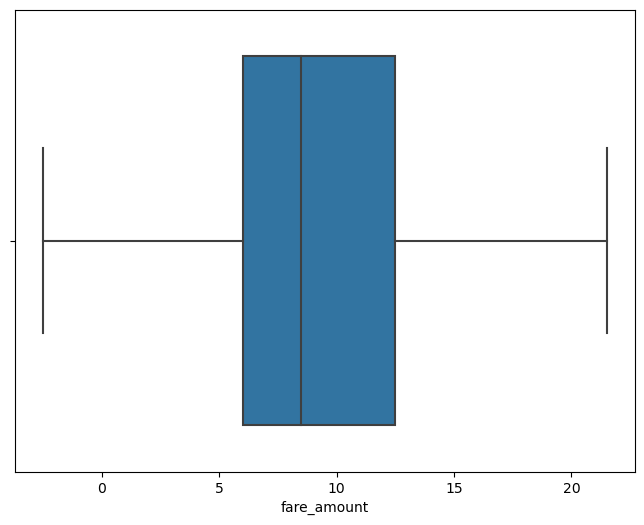

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='fare_amount',data=df)

<Axes: xlabel='fare_amount', ylabel='Count'>

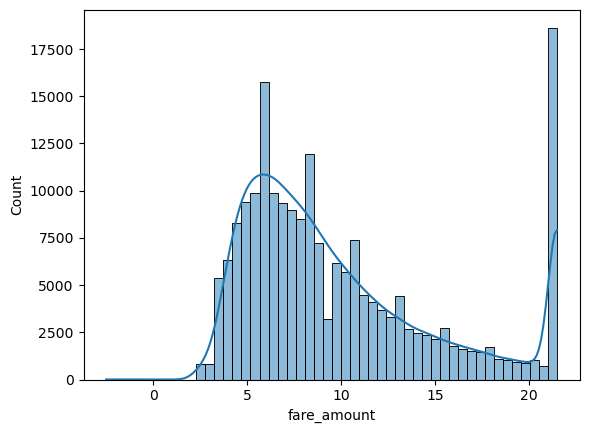

In [32]:
sns.histplot(df['fare_amount'],bins=50,kde=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_13052\2772932758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

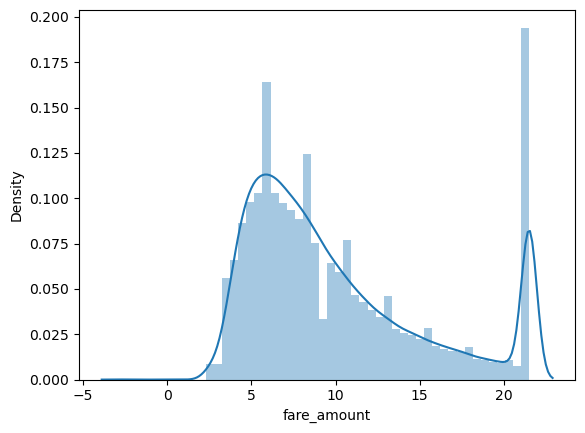

In [33]:
sns.distplot(df['fare_amount'])

## Feature Engineering

In [34]:
df['pickup_datetime']

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [35]:
df['date']=df['pickup_datetime'].apply(lambda x:x.split(' ')[0])

In [36]:
df['pickup_time']=df['pickup_datetime'].apply(lambda x:x.split(' ')[1])

In [37]:
df['date']=pd.to_datetime(df['date'],format='%Y-%M-%d')

In [38]:
df['year']=df['date'].dt.year

In [39]:
df['hour']=df['pickup_time'].apply(lambda x:x.split(':')[0])

In [40]:
df['hour']=df['hour'].astype(int)

In [41]:
df=df.drop(['date','pickup_time'],axis=1)

In [42]:
df=df.drop(['key','Unnamed: 0','pickup_datetime'],axis=1)

In [44]:
b = [-1,12,17,21,24]
l = ['Morning','afterNoon','Eve','night']
df['session'] = pd.cut(df['hour'], bins=b, labels=l)

In [47]:
df['session']

0               Eve
1               Eve
2               Eve
3           Morning
4         afterNoon
            ...    
199995      Morning
199996      Morning
199997      Morning
199998    afterNoon
199999      Morning
Name: session, Length: 200000, dtype: category
Categories (4, object): ['Morning' < 'afterNoon' < 'Eve' < 'night']

In [ ]:
#bins=[-1,3,8,17]
#labels=['short','medium','long']
#df['distance_category']=pd.cut(df['distance'],bins=bins,labels=labels)

In [ ]:
#df['distance_category']

In [ ]:
#df['distance_category'].isnull().sum()

In [48]:
df=df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [50]:
df=df.drop(['year'],axis=1)

In [51]:
df.head(20)

,fare_amount,passenger_count,distance,hour,session
0,7.5,1,2.0,19,Eve
1,7.7,1,2.0,20,Eve
2,12.9,1,5.0,21,Eve
3,5.3,3,2.0,8,Morning
4,16.0,5,4.0,17,afterNoon
5,4.9,1,0.0,2,Morning
6,21.5,5,12.0,7,Morning
7,2.5,1,0.0,13,afterNoon
8,9.7,1,2.0,9,Morning
9,12.5,1,5.0,19,Eve


## Visualization

### univariate analyses

Text(0.5, 1.0, 'count of session')

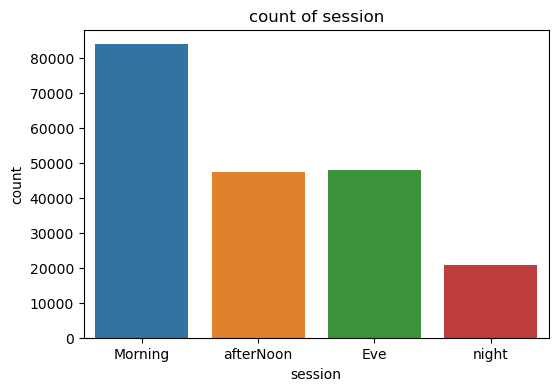

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='session',data=df)
plt.title("count of session")

### bivariate

Text(0, 0.5, 'Fare amount')

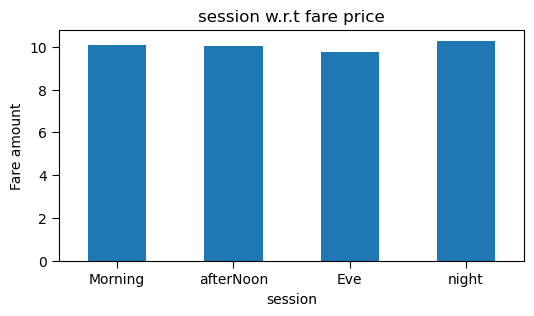

In [54]:
plt.figure(figsize=(6,3))
df.groupby("session")['fare_amount'].mean().plot.bar()
plt.title("session w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("session")
plt.ylabel("Fare amount")

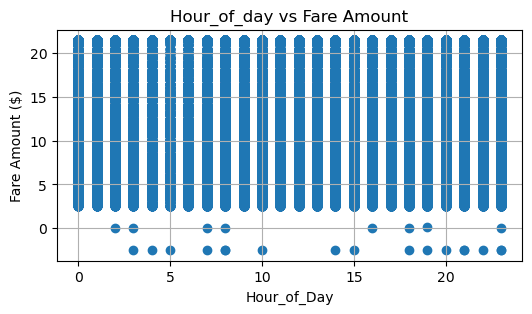

In [132]:
# Plot graph between hour and fare amount
plt.figure(figsize=(6, 3))
plt.scatter(df['hour'], df['fare_amount'])
plt.title('Hour_of_day vs Fare Amount')
plt.xlabel('Hour_of_Day')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [ ]:
#plt.figure(figsize=(6,3))
df.groupby("distance_category")['fare_amount'].mean().plot.bar()
plt.title("Distance category  w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("Distance category")
plt.ylabel("Fare amount")


Text(0, 0.5, 'Fare amount')

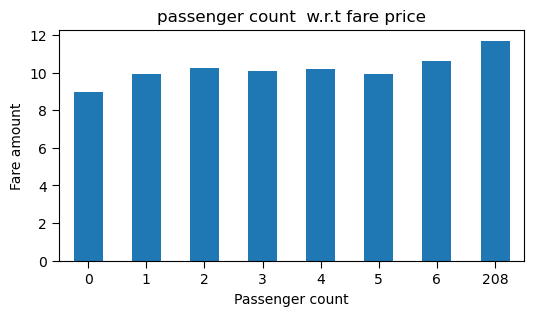

In [56]:
plt.figure(figsize=(6,3))
df.groupby("passenger_count")['fare_amount'].mean().plot.bar()
plt.title("passenger count  w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("Passenger count")
plt.ylabel("Fare amount")

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(y='fare_amount',x='distance_category',data=df)
plt.title("Linear relationship b/w distance catrgory w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("Distance catrgory")
plt.ylabel("Fare amount")

Text(0, 0.5, 'Fare amount')

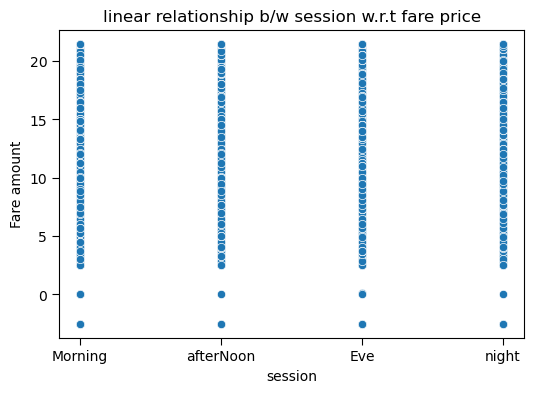

In [57]:
plt.figure(figsize=(6,3))
sns.scatterplot(y='fare_amount',x='session',data=df)
plt.title("linear relationship b/w session w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("session")
plt.ylabel("Fare amount")

Text(0, 0.5, 'Fare amount')

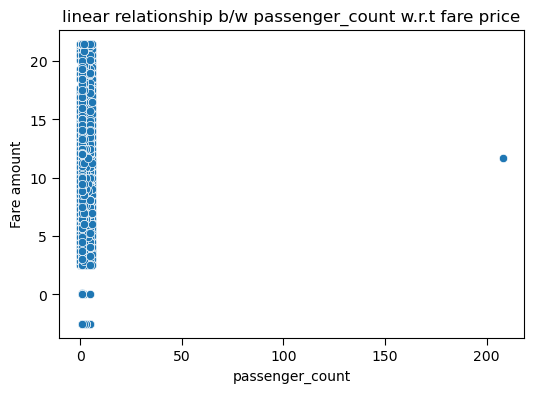

In [58]:
plt.figure(figsize=(6,4))
sns.scatterplot(y='fare_amount',x='passenger_count',data=df)
plt.title("linear relationship b/w passenger_count w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("passenger_count")
plt.ylabel("Fare amount")

Text(0, 0.5, 'Fare amount')

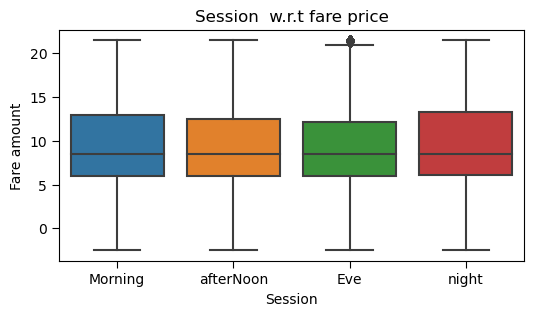

In [59]:
plt.figure(figsize=(6,3))
sns.boxplot(x = 'session', y = 'fare_amount', data = df)
plt.title("Session  w.r.t fare price")
plt.tick_params(size=5,labelsize = 10)
plt.xticks(rotation=360)
plt.xlabel("Session")
plt.ylabel("Fare amount")

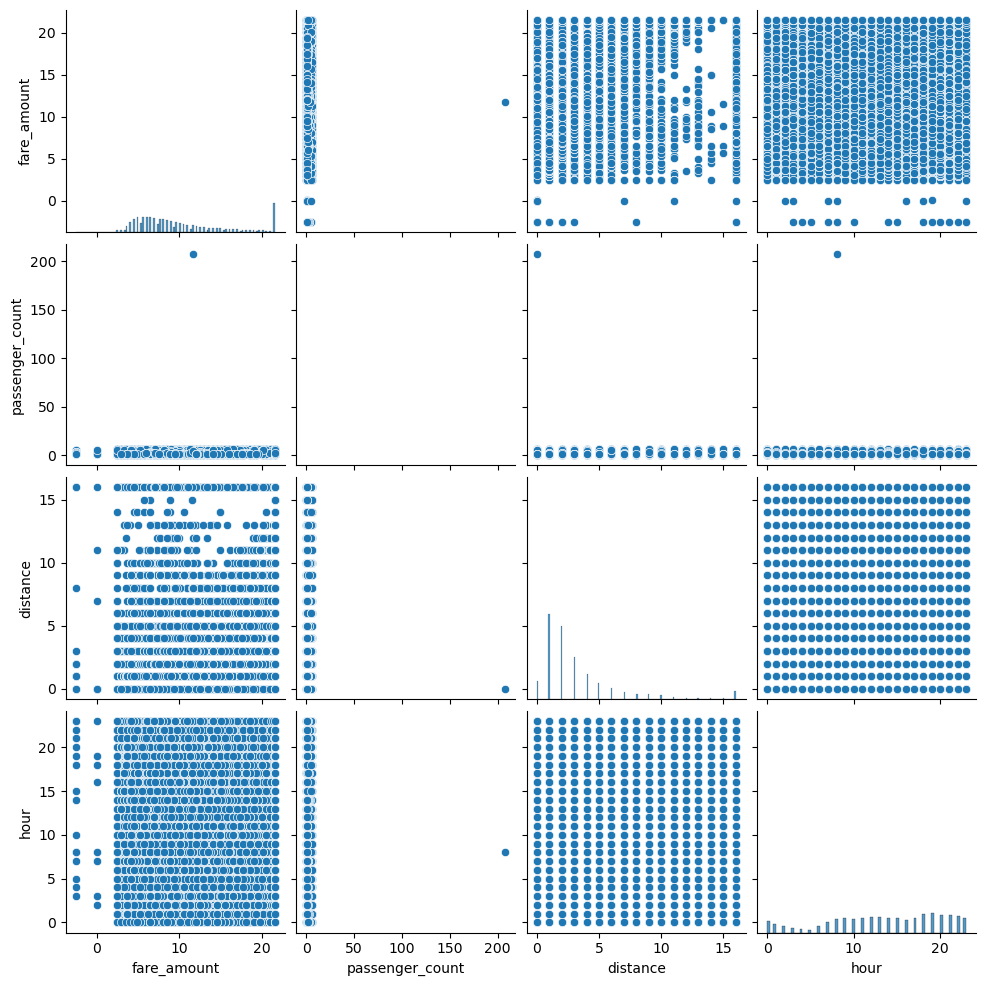

In [60]:
sns.pairplot(df)

In [61]:
df.corr()

C:\Users\Sony\AppData\Local\Temp\ipykernel_13052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fare_amount,passenger_count,distance,hour
fare_amount,1.000000,0.013734,0.788974,-0.023419
passenger_count,0.013734,1.000000,0.007017,0.013196
distance,0.788974,0.007017,1.000000,-0.034034
hour,-0.023419,0.013196,-0.034034,1.000000


C:\Users\Sony\AppData\Local\Temp\ipykernel_13052\1856934579.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


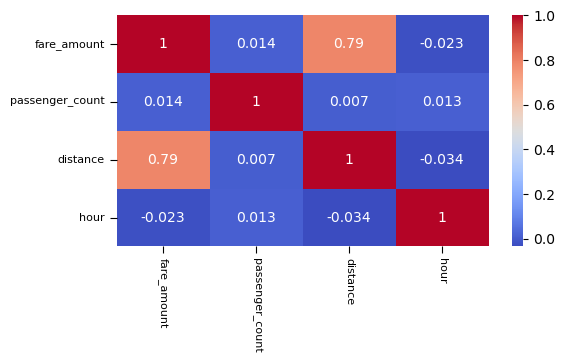

In [62]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.xticks(rotation=270)
plt.tick_params(size=5,labelsize = 8)

### Create dummies for categorical variable

In [ ]:
df

In [63]:
session_dummy = pd.get_dummies(df['session'],drop_first=True)

In [64]:
session_dummy

,afterNoon,Eve,night
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0
...,...,...,...
199995,0,0,0
199996,0,0,0
199997,0,0,0
199998,1,0,0


In [65]:
df=pd.concat([df,session_dummy],axis=1)

In [66]:
df=df.drop('session',axis=1)

In [ ]:
#distance_dummy=pd.get_dummies(df['distance_category'],drop_first=True)
df=pd.concat([df,distance_dummy],axis=1)

In [ ]:
#df=df.drop('distance_category',axis=1)

In [ ]:
#df=df.drop(['afterNoon','Eve'],axis=1)

In [67]:
df

,fare_amount,passenger_count,distance,hour,afterNoon,Eve,night
0,7.5,1,2.0,19,0,1,0
1,7.7,1,2.0,20,0,1,0
2,12.9,1,5.0,21,0,1,0
3,5.3,3,2.0,8,0,0,0
4,16.0,5,4.0,17,1,0,0
...,...,...,...,...,...,...,...
199995,3.0,1,0.0,10,0,0,0
199996,7.5,1,2.0,1,0,0,0
199997,21.5,2,13.0,0,0,0,0
199998,14.5,1,4.0,14,1,0,0


In [68]:
df.corr()

,fare_amount,passenger_count,distance,hour,afterNoon,Eve,night
fare_amount,1.000000,0.013734,0.788974,-0.023419,-0.000254,-0.025431,0.017334
passenger_count,0.013734,1.000000,0.007017,0.013196,0.000953,0.011217,0.013966
distance,0.788974,0.007017,1.000000,-0.034034,-0.018924,-0.022111,0.028832
hour,-0.023419,0.013196,-0.034034,1.000000,0.125603,0.514917,0.469882
afterNoon,-0.000254,0.000953,-0.018924,0.125603,1.000000,-0.312919,-0.190173
Eve,-0.025431,0.011217,-0.022111,0.514917,-0.312919,1.000000,-0.191276
night,0.017334,0.013966,0.028832,0.469882,-0.190173,-0.191276,1.000000


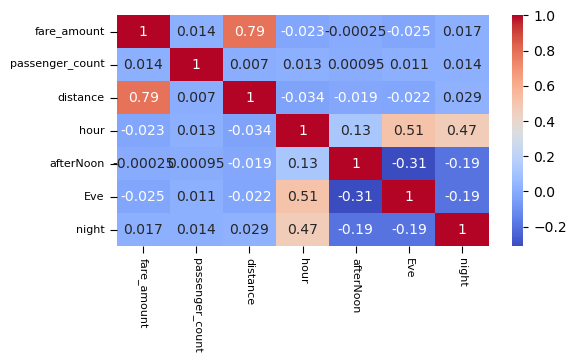

In [69]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.xticks(rotation=270)
plt.tick_params(size=5,labelsize = 8)

### train test split 

In [70]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,train_size=0.7,random_state=100)

In [71]:
df_train.shape

(140000, 7)

In [72]:
df_test.shape

(60000, 7)

### standardization

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [74]:
col=['fare_amount','passenger_count','distance','hour']
df_train[col]=scaler.fit_transform(df_train[col])
df_test[col]=scaler.transform(df_test[col])

<Axes: >

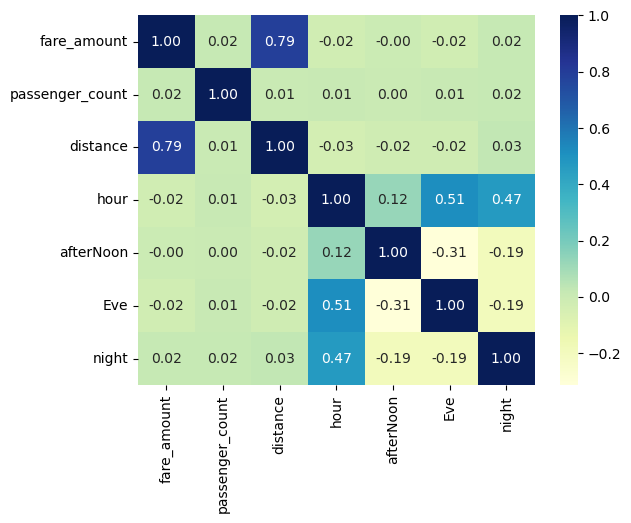

In [75]:
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",fmt=".2f")

### correlation analysis

### From the correlation matrix  we conclude that 
1:Distance are positively correlated with the target variable.
2Afternoon and evening time are negatively correlated with the target variable.
3:Passenger count is very less but positevely correlated with target variable.

## Dividing the data set in to X and Y

In [76]:
y_train = df_train.pop('fare_amount')
X_train = df_train

In [77]:
X_train

,passenger_count,distance,hour,afterNoon,Eve,night
195896,0.931428,-0.369481,-1.919726,0,0,0
47114,0.224937,0.247474,0.229147,1,0,0
144875,-0.481554,-0.677959,-0.231326,0,0,0
184791,0.224937,-0.677959,0.843110,0,1,0
123269,0.224937,-0.677959,-0.998781,0,0,0
...,...,...,...,...,...,...
194442,-0.481554,-0.061004,1.457074,0,0,1
65615,0.224937,-0.061004,0.843110,0,1,0
77655,-0.481554,-0.986436,-0.384817,0,0,0
56088,-0.481554,-0.061004,0.536128,1,0,0


In [78]:
y_train

195896   -0.379462
47114     0.621619
144875   -1.040553
184791   -1.134994
123269   -0.568345
            ...   
194442    0.092746
65615    -0.360573
77655     0.848279
56088     0.546066
38408     0.168299
Name: fare_amount, Length: 140000, dtype: float64

## Building the regression model

### Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [85]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
model1 = sm.OLS(y_train, X_train_lm).fit()

In [86]:
model1.params

const              0.031932
passenger_count    0.009905
distance           0.791165
hour               0.034499
afterNoon         -0.015682
Eve               -0.076395
night             -0.094544
dtype: float64

In [84]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 3.883e+04
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        22:46:09   Log-Likelihood:            -1.3006e+05
No. Observations:              140000   AIC:                         2.601e+05
Df Residuals:                  139993   BIC:                         2.602e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.005     

In [ ]:

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
lr.params

In [ ]:
lr.summary()

### checking VIF

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hour,1.70
4,Eve,1.34
5,night,1.34
3,afterNoon,1.02
0,passenger_count,1.00
1,distance,1.00


#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

#### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, afternoon as it has a  high p-value of 0.014. Let's go ahead and drop this variables

### Drop the afternoon variable and build the new model

In [90]:
x = X_train.drop('afterNoon', 1,)

C:\Users\Sony\AppData\Local\Temp\ipykernel_13052\1005310684.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = X_train.drop('afterNoon', 1,)


In [91]:
X_train_lm = sm.add_constant(x)

# Create a first fitted model
model2= sm.OLS(y_train, X_train_lm).fit()

In [92]:
model2.params

const              0.022221
passenger_count    0.009832
distance           0.791019
hour               0.027231
Eve               -0.060027
night             -0.074819
dtype: float64

In [93]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 4.659e+04
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        22:51:15   Log-Likelihood:            -1.3006e+05
No. Observations:              140000   AIC:                         2.601e+05
Df Residuals:                  139994   BIC:                         2.602e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0222      0.002      8.948      0.000       0.017       0.027
passenger_count     0.0098      0.002      6.003      0.000       0.007       0.013
distance            0.7910      0.002    481.931      0.000       0.788       0.794
hour                0.0272      0.003     10.481      0.000       0.022       0.032
Eve                -0.0600      0.005    -10.983      0.000      -0.071      -0.049
night              -0.0748      0.007    -10.093      0.000      -0.089      -0.060
==============================================================================
Omnibus:                    28774.187   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           209380.576
Skew:                           0.800   Prob(JB):                         0.00
Kurtosis:                       8.773   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now as you can see, the p-values are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis of the train data

In [94]:
y_pred=model2.predict(X_train_lm)

C:\Users\Sony\AppData\Local\Temp\ipykernel_13052\3208309788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_pred), bins = 20)
C:\Users\Sony\anaconda3\Lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Sony\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sony\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Errors')

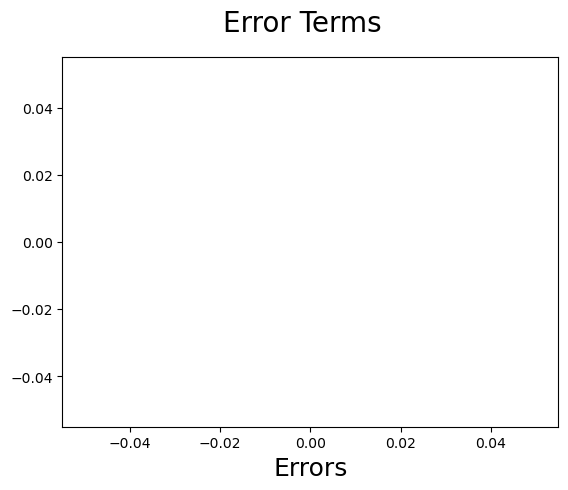

In [136]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Making Predictions Using the Final Model

In [96]:
df_test.shape

(60000, 7)

In [97]:
y_test=df_test.pop("fare_amount")


In [98]:
x_test=df_test

In [99]:
x_test.shape

(60000, 6)

In [100]:
y_test.shape

(60000,)

In [101]:
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)


In [102]:
x = x_test.drop('afterNoon', 1,)

C:\Users\Sony\AppData\Local\Temp\ipykernel_13052\861558147.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x_test.drop('afterNoon', 1,)


In [ ]:
x

In [104]:
y_pred_test = model2.predict(x)

## Model Evaluation

Text(0, 0.5, 'y_pred_test')

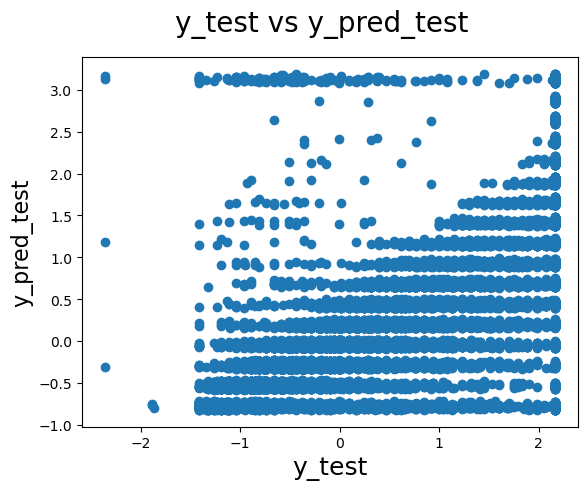

In [106]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16) 

### Using sklearn library

In [107]:
from sklearn.metrics import mean_squared_error

dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE):", dt_rmse)

Root Mean Squared Error (RMSE): 0.6171551010162966


In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
regression=LinearRegression()

In [112]:
regression.fit(X_train,y_train)

LinearRegression()

In [113]:
regression.coef_

array([ 0.00990529,  0.79116459,  0.03449858, -0.01568204, -0.07639488,
       -0.09454365])

In [114]:
regression.intercept_

0.03193153329442189

In [117]:
y_prediction=regression.predict(X_train)

In [118]:
y_prediction

array([-0.31739069,  0.2221754 , -0.51719582, ..., -0.76654758,
       -0.0182887 , -0.30546964])

In [119]:
#prediction for test data

In [127]:
y_test_pred=regression.predict(x_test)
y_test_pred

array([-0.51169699, -0.06311589,  0.20666954, ..., -0.51699221,
       -0.30943553, -0.54593374])

In [124]:
#x_test=x_test.drop('const',axis=1)

In [130]:
#performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [129]:
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
print(mse)
print(mae)

0.38086620791364334
0.4460548940958513


In [131]:
r2_score(y_test,y_test_pred)

0.6191628147416193